In [1]:
print("test")

test


In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM, Dense

print("ok")


ok


In [32]:
# ความหวาน

sugar = pd.read_csv("ความหวาน.csv")
dataSugar = sugar.iloc[130:250 ,1:2]

valueSugar = dataSugar['brix(%)'].values
print(valueSugar)

['11.8' '13.2' '10.6' '12' '12.8' '10.6' '10.4' '12.6' '13.4' '13.6' '9.8'
 '12' '11.6' '11' '12' '9.6' '11.2' '9.2' '12.8' '13.6' '12.6' '9.6'
 '13.2' '11.4' '11' '12.6' '11' '10' '11.2' '11' '13' '11.4' '11.8' '13'
 '11.6' '10.2' '10.6' '12' '14' '11.2' '12' '13' '11' '13' '11.6' '12.6'
 '10.8' '10.8' '10.6' '12' '9.5' '8.5' '9' '8.5' '9' '10' '9' '9.5' '9.5'
 '10' '9.5' '9.5' '8.5' '9' '8.5' '10' '9.5' '8.5' '9' '9.5' '9' '9' '9'
 '7.5' '9.5' '9.5' '10' '8.5' '9' '10' '8.5' '7.5' '9.5' '9.5' '9' '9.5'
 '9' '9' '7.5' '8' '9.5' '10' '9.5' '8.5' '10' '9.5' '10.5' '7.5' '9.5'
 '10' '9' '9' '9.5' '9.5' '7.5' '9' '9.5' '10' '9.5' '7.5' '9' '9.5' '8.5'
 '9' '9' '9' '10' '10' '9.5' '7.5']


In [4]:
dataSam = pd.read_csv('all_files_t.csv')
dataSam

,wavelength,131_t.csv,132_t.csv,133_t.csv,134_t.csv,135_t.csv,136_t.csv,137_t.csv,138_t.csv,139_t.csv,...,241_t.csv,242_t.csv,243_t.csv,244_t.csv,245_t.csv,246_t.csv,247_t.csv,248_t.csv,249_t.csv,250_t.csv
0,340,45.0,32.0,0.0,0.0,49.0,81.0,0.0,0.0,27.0,...,36.0,0.0,12.0,0.0,21.0,7.0,7.0,28.0,0.0,84.0
1,341,31.0,0.0,0.0,0.0,127.0,33.0,0.0,0.0,0.0,...,12.0,0.0,6.0,0.0,0.0,0.0,0.0,60.0,5.0,22.0
2,342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,343,103.0,147.0,0.0,133.0,103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,0.0,0.0,5.0,17.0,49.0
4,344,131.0,0.0,0.0,8.0,0.0,0.0,8.0,0.0,89.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,996,1077.0,1170.0,1320.0,1203.0,1449.0,1746.0,1923.0,1937.0,2410.0,...,495.0,659.0,333.0,789.0,608.0,446.0,548.0,936.0,664.0,664.0
657,997,1169.0,1168.0,1212.0,1095.0,1493.0,1723.0,2022.0,1947.0,2560.0,...,560.0,595.0,477.0,761.0,712.0,463.0,560.0,938.0,599.0,705.0
658,998,1286.0,1424.0,1457.0,1375.0,1831.0,2102.0,2276.0,2230.0,2733.0,...,714.0,814.0,567.0,980.0,882.0,602.0,729.0,1063.0,730.0,896.0
659,999,1163.0,1258.0,1417.0,1301.0,1737.0,1969.0,2234.0,2183.0,2618.0,...,654.0,774.0,564.0,867.0,904.0,594.0,713.0,1001.0,728.0,780.0


In [21]:
# y = dataSam.iloc[:, 1:].transpose() 
dataGraph = dataSam.iloc[:, 1:]

dataGraph

,131_t.csv,132_t.csv,133_t.csv,134_t.csv,135_t.csv,136_t.csv,137_t.csv,138_t.csv,139_t.csv,140_t.csv,...,241_t.csv,242_t.csv,243_t.csv,244_t.csv,245_t.csv,246_t.csv,247_t.csv,248_t.csv,249_t.csv,250_t.csv
0,45.0,32.0,0.0,0.0,49.0,81.0,0.0,0.0,27.0,13.0,...,36.0,0.0,12.0,0.0,21.0,7.0,7.0,28.0,0.0,84.0
1,31.0,0.0,0.0,0.0,127.0,33.0,0.0,0.0,0.0,0.0,...,12.0,0.0,6.0,0.0,0.0,0.0,0.0,60.0,5.0,22.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,103.0,147.0,0.0,133.0,103.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,0.0,0.0,5.0,17.0,49.0
4,131.0,0.0,0.0,8.0,0.0,0.0,8.0,0.0,89.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,1077.0,1170.0,1320.0,1203.0,1449.0,1746.0,1923.0,1937.0,2410.0,2306.0,...,495.0,659.0,333.0,789.0,608.0,446.0,548.0,936.0,664.0,664.0
657,1169.0,1168.0,1212.0,1095.0,1493.0,1723.0,2022.0,1947.0,2560.0,2185.0,...,560.0,595.0,477.0,761.0,712.0,463.0,560.0,938.0,599.0,705.0
658,1286.0,1424.0,1457.0,1375.0,1831.0,2102.0,2276.0,2230.0,2733.0,2610.0,...,714.0,814.0,567.0,980.0,882.0,602.0,729.0,1063.0,730.0,896.0
659,1163.0,1258.0,1417.0,1301.0,1737.0,1969.0,2234.0,2183.0,2618.0,2530.0,...,654.0,774.0,564.0,867.0,904.0,594.0,713.0,1001.0,728.0,780.0


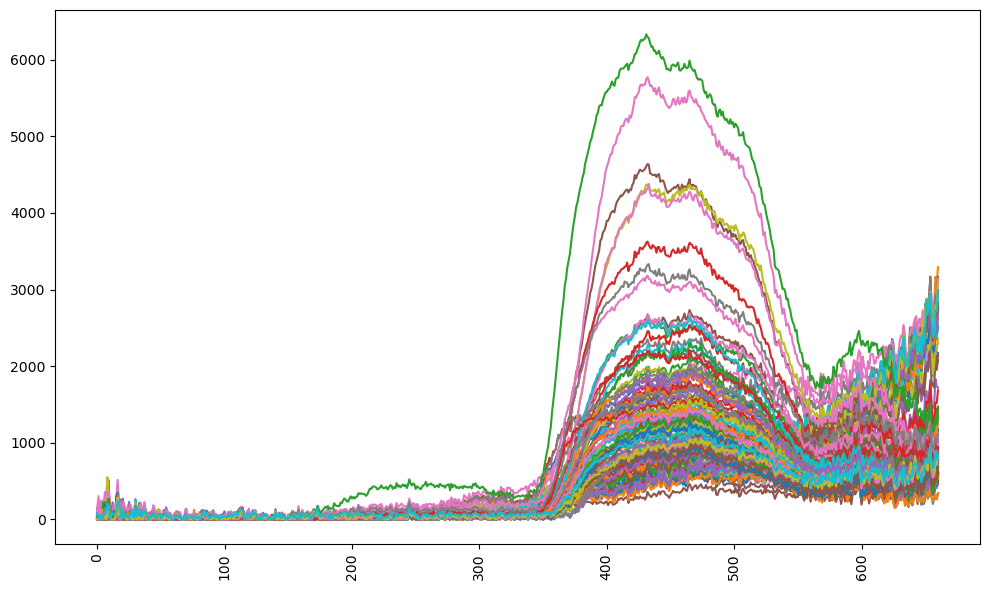

In [23]:
plt.figure(figsize=(10, 6))
# plt.plot(dataSam['wavelength'], dataSam.iloc[:, 1:])
plt.plot(dataGraph)

plt.xticks(rotation=90)  # สำหรับหมุน 90 องศา
plt.xticks(fontsize=10)  # สามารถปรับขนาดของ font ได้ด้วย
plt.tight_layout()
plt.show()

In [33]:
dataGraph.shape

(661, 120)

In [34]:
valueSugar.shape

(120,)

In [38]:
# แบ่งข้อมูลเป็นชุดฝึกสอนและชุดทดสอบ
X = dataGraph.transpose() 
y = valueSugar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# ตัวอย่างนี้ใช้ชั้นซ่อนเดียว (hidden layer) ที่มี 100 นิวรอน
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)


In [41]:
# ฝึกโมเดลด้วยชุดข้อมูลฝึกสอน
mlp_regressor.fit(X_train, y_train)

MLPRegressor(max_iter=500, random_state=42)

In [42]:
# ทำนายความหวานของน้ำตาลจากชุดข้อมูลทดสอบ
predictions = mlp_regressor.predict(X_test)

In [43]:
# ประเมินประสิทธิภาพของโมเดลด้วย Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2940.650362541108


In [44]:
# แสดงผลลัพธ์การทำนาย
print("Predictions:", predictions)

Predictions: [ 51.19849772  60.41189724  26.94673143  18.27625638  40.82756674
  24.91678344  59.60097673  96.54485198 122.90707034  32.41572481
  46.96564257  56.08840055  89.31787899  58.42198428  65.07540517
  56.71381376  59.92640198  11.78462573 -18.83927577  67.27150271
  45.38016399 135.44701491  48.3242202   23.77144118]


## test Deep learning 

In [77]:
dataGraph.values

array([[  45.,   32.,    0., ...,   28.,    0.,   84.],
       [  31.,    0.,    0., ...,   60.,    5.,   22.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [1286., 1424., 1457., ..., 1063.,  730.,  896.],
       [1163., 1258., 1417., ..., 1001.,  728.,  780.],
       [1277., 1430., 1441., ..., 1111.,  831.,  823.]])

In [64]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(661, 120))) 
model.add(Dense(1)) 

In [65]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [67]:
model.fit(dataGraph.transpose(), valueSugar, epochs=100, batch_size=32)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_5' (type Sequential).
    
    Input 0 of layer "lstm_5" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 661)
    
    Call arguments received by layer 'sequential_5' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 661), dtype=float64)
      • training=True
      • mask=None


In [71]:
# dataGraph.transpose().values.shape
dataGraph.transpose().values

array([[  45.,   31.,    0., ..., 1286., 1163., 1277.],
       [  32.,    0.,    0., ..., 1424., 1258., 1430.],
       [   0.,    0.,    0., ..., 1457., 1417., 1441.],
       ...,
       [  28.,   60.,    0., ..., 1063., 1001., 1111.],
       [   0.,    5.,    0., ...,  730.,  728.,  831.],
       [  84.,   22.,    0., ...,  896.,  780.,  823.]])